<a href="https://colab.research.google.com/github/Polyakri/projects/blob/main/MachineLearningProjects/ANN_CNN/Ex_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 ANOTE:
In this exercise I wanted to train different MLP models just to get the picture so I trained many models.

#Importing Libraries

In [ ]:
import tensorflow as tf
import random
import time
import os
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import joblib
import sys
from tensorflow.keras.models import load_model, save_model

Import Mnist

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train.shape, y_train.shape, x_test.shape, y_test.shape

11490434/11490434 [==============================] - 0s 0us/step


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

Print 1 of each digits

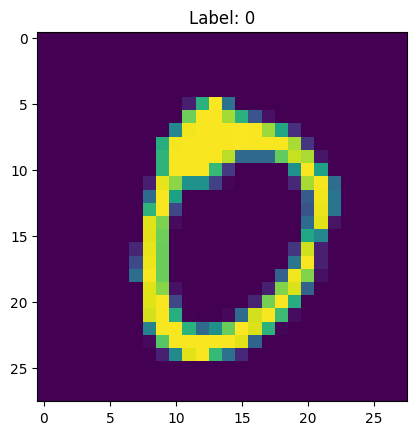

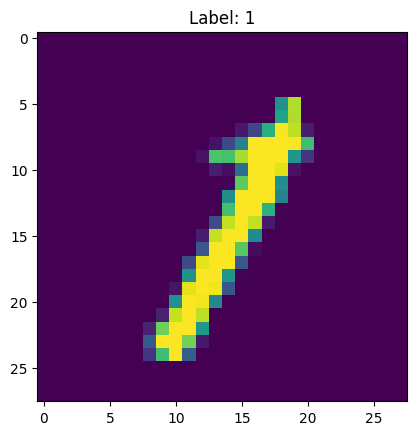

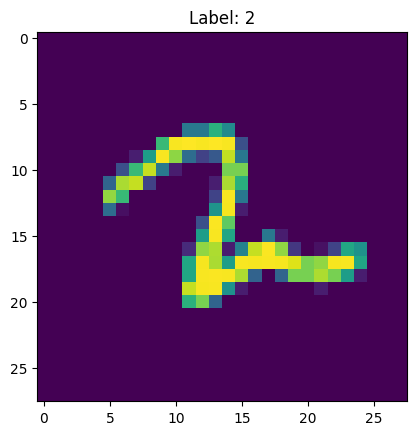

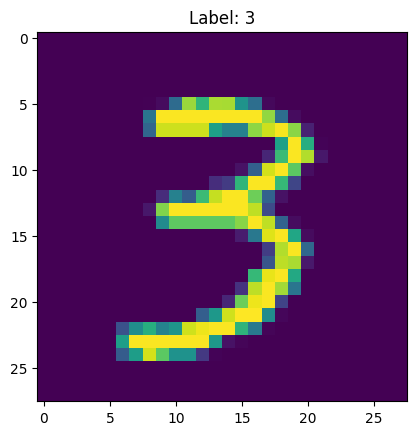

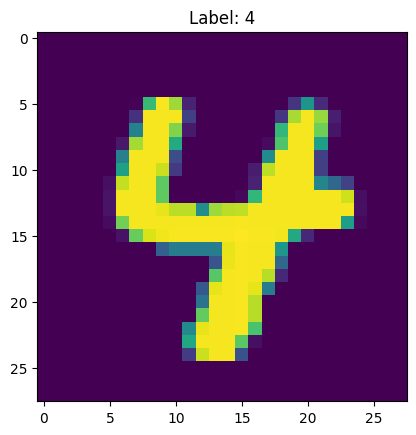

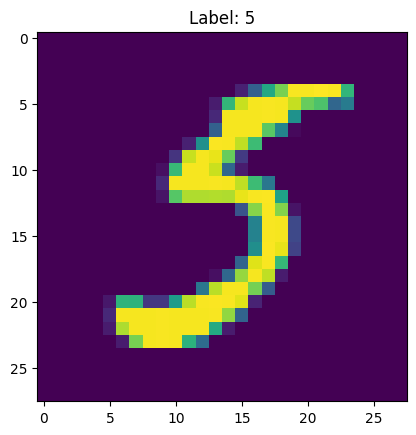

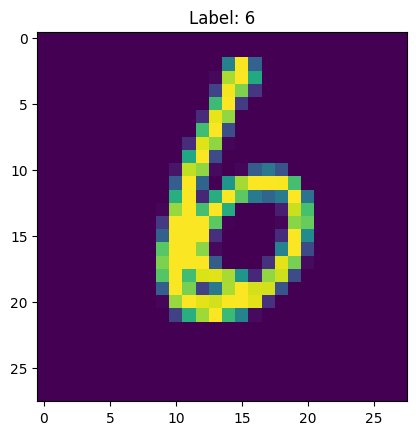

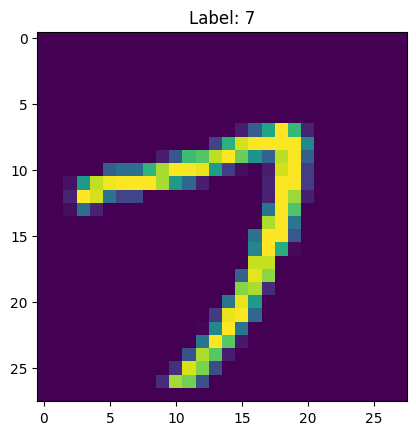

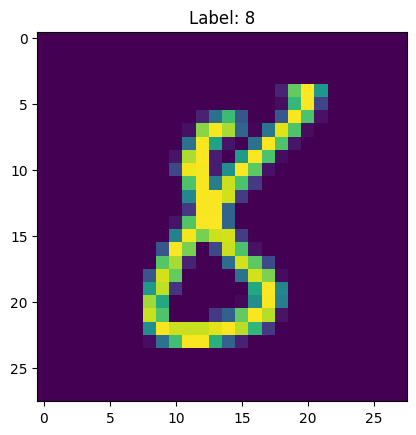

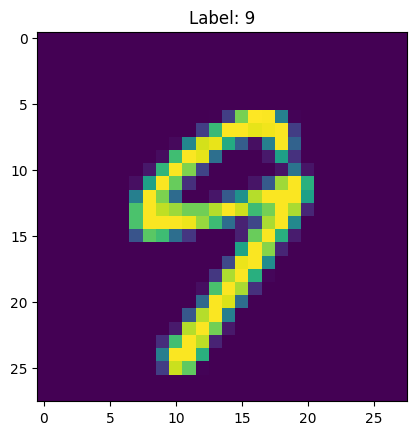

In [ ]:
for i in range(10):
    yid = y_train == i
    img = random.choice(x_train[yid])
    plt.imshow(img)
    plt.title(f"Label: {i}")
    plt.show()

MNIST dataset is a low resolution handwritten digits with their label. The resolution is low and also the digits are mostly bad written.

Reshape the images

In [ ]:
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

x_train shape: (60000, 784)
x_test shape: (10000, 784)
y_train shape: (60000,)
y_test shape: (10000,)


#Scikit MLP

I trained the neural networks and then saved them in order not to re train every time

In [ ]:
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import joblib  # Use joblib for model persistence
import time


hidden_layer_sizes_list = [(64,), (128,), (64, 64), (128, 64), (64, 32, 16)]
activation_functions = ['relu', 'logistic', 'tanh']
alpha_values = [0.01, 0.03, 0.05]

# Initialize an empty DataFrame to store the results
results_df = pd.DataFrame(columns=['Hidden_Layer_Sizes', 'Activation', 'Alpha', 'Accuracy', 'Precision', 'Recall', 'F1_Score'])

for hidden_layer_sizes in hidden_layer_sizes_list:
    for activation in activation_functions:
        for alpha in alpha_values:
            model_filename = f"/content/drive/MyDrive/mlp_model_{str(hidden_layer_sizes)}_{activation}_{alpha}.joblib"

            if os.path.exists(model_filename):
                # Load the existing model
                loaded_model = joblib.load(model_filename)
                print(f"Model already trained. Predicting results for parameters: Hidden_Layer_Sizes={hidden_layer_sizes}, Activation={activation}, Alpha={alpha}")
            else:
                # Train and save the model
                mlp = MLPClassifier(
                    hidden_layer_sizes=hidden_layer_sizes,
                    alpha=alpha,
                    solver="adam",
                    activation=activation,
                    random_state=0
                )

                print(f"Training model with parameters: Hidden_Layer_Sizes={hidden_layer_sizes}, Activation={activation}, Alpha={alpha}")

                mlp.fit(x_train, y_train)


                joblib.dump(mlp, model_filename)

                # Load the model back
                loaded_model = joblib.load(model_filename)

            y_pred = loaded_model.predict(x_test)

            accuracy = accuracy_score(y_pred, y_test)
            precision = precision_score(y_test, y_pred, average='weighted')
            recall = recall_score(y_test, y_pred, average='weighted')
            f1 = f1_score(y_test, y_pred, average='weighted')

            # Append results to the DataFrame
            results_df = results_df.append({
                'Hidden_Layer_Sizes': hidden_layer_sizes,
                'Activation': activation,
                'Alpha': alpha,
                'Accuracy': accuracy,
                'Precision': precision,
                'Recall': recall,
                'F1_Score': f1
            }, ignore_index=True)

print(results_df)
results_df.to_csv('/content/drive/MyDrive/results.csv', index=False)


Model already trained. Predicting results for parameters: Hidden_Layer_Sizes=(64,), Activation=relu, Alpha=0.01


<ipython-input-5-5604d573dca8>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Model already trained. Predicting results for parameters: Hidden_Layer_Sizes=(64,), Activation=relu, Alpha=0.03


<ipython-input-5-5604d573dca8>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Model already trained. Predicting results for parameters: Hidden_Layer_Sizes=(64,), Activation=relu, Alpha=0.05


<ipython-input-5-5604d573dca8>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Model already trained. Predicting results for parameters: Hidden_Layer_Sizes=(64,), Activation=logistic, Alpha=0.01


<ipython-input-5-5604d573dca8>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Model already trained. Predicting results for parameters: Hidden_Layer_Sizes=(64,), Activation=logistic, Alpha=0.03


<ipython-input-5-5604d573dca8>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Model already trained. Predicting results for parameters: Hidden_Layer_Sizes=(64,), Activation=logistic, Alpha=0.05


<ipython-input-5-5604d573dca8>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Model already trained. Predicting results for parameters: Hidden_Layer_Sizes=(64,), Activation=tanh, Alpha=0.01


<ipython-input-5-5604d573dca8>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Model already trained. Predicting results for parameters: Hidden_Layer_Sizes=(64,), Activation=tanh, Alpha=0.03


<ipython-input-5-5604d573dca8>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Model already trained. Predicting results for parameters: Hidden_Layer_Sizes=(64,), Activation=tanh, Alpha=0.05


<ipython-input-5-5604d573dca8>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Model already trained. Predicting results for parameters: Hidden_Layer_Sizes=(128,), Activation=relu, Alpha=0.01


<ipython-input-5-5604d573dca8>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Model already trained. Predicting results for parameters: Hidden_Layer_Sizes=(128,), Activation=relu, Alpha=0.03


<ipython-input-5-5604d573dca8>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Model already trained. Predicting results for parameters: Hidden_Layer_Sizes=(128,), Activation=relu, Alpha=0.05


<ipython-input-5-5604d573dca8>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Model already trained. Predicting results for parameters: Hidden_Layer_Sizes=(128,), Activation=logistic, Alpha=0.01


<ipython-input-5-5604d573dca8>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Model already trained. Predicting results for parameters: Hidden_Layer_Sizes=(128,), Activation=logistic, Alpha=0.03


<ipython-input-5-5604d573dca8>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Model already trained. Predicting results for parameters: Hidden_Layer_Sizes=(128,), Activation=logistic, Alpha=0.05


<ipython-input-5-5604d573dca8>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Model already trained. Predicting results for parameters: Hidden_Layer_Sizes=(128,), Activation=tanh, Alpha=0.01


<ipython-input-5-5604d573dca8>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Model already trained. Predicting results for parameters: Hidden_Layer_Sizes=(128,), Activation=tanh, Alpha=0.03


<ipython-input-5-5604d573dca8>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Model already trained. Predicting results for parameters: Hidden_Layer_Sizes=(128,), Activation=tanh, Alpha=0.05


<ipython-input-5-5604d573dca8>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Model already trained. Predicting results for parameters: Hidden_Layer_Sizes=(64, 64), Activation=relu, Alpha=0.01


<ipython-input-5-5604d573dca8>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Model already trained. Predicting results for parameters: Hidden_Layer_Sizes=(64, 64), Activation=relu, Alpha=0.03


<ipython-input-5-5604d573dca8>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Model already trained. Predicting results for parameters: Hidden_Layer_Sizes=(64, 64), Activation=relu, Alpha=0.05


<ipython-input-5-5604d573dca8>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Model already trained. Predicting results for parameters: Hidden_Layer_Sizes=(64, 64), Activation=logistic, Alpha=0.01


<ipython-input-5-5604d573dca8>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Model already trained. Predicting results for parameters: Hidden_Layer_Sizes=(64, 64), Activation=logistic, Alpha=0.03


<ipython-input-5-5604d573dca8>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Model already trained. Predicting results for parameters: Hidden_Layer_Sizes=(64, 64), Activation=logistic, Alpha=0.05


<ipython-input-5-5604d573dca8>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Model already trained. Predicting results for parameters: Hidden_Layer_Sizes=(64, 64), Activation=tanh, Alpha=0.01


<ipython-input-5-5604d573dca8>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Model already trained. Predicting results for parameters: Hidden_Layer_Sizes=(64, 64), Activation=tanh, Alpha=0.03


<ipython-input-5-5604d573dca8>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Model already trained. Predicting results for parameters: Hidden_Layer_Sizes=(64, 64), Activation=tanh, Alpha=0.05


<ipython-input-5-5604d573dca8>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Model already trained. Predicting results for parameters: Hidden_Layer_Sizes=(128, 64), Activation=relu, Alpha=0.01


<ipython-input-5-5604d573dca8>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Model already trained. Predicting results for parameters: Hidden_Layer_Sizes=(128, 64), Activation=relu, Alpha=0.03


<ipython-input-5-5604d573dca8>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Model already trained. Predicting results for parameters: Hidden_Layer_Sizes=(128, 64), Activation=relu, Alpha=0.05


<ipython-input-5-5604d573dca8>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Model already trained. Predicting results for parameters: Hidden_Layer_Sizes=(128, 64), Activation=logistic, Alpha=0.01


<ipython-input-5-5604d573dca8>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Model already trained. Predicting results for parameters: Hidden_Layer_Sizes=(128, 64), Activation=logistic, Alpha=0.03


<ipython-input-5-5604d573dca8>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Model already trained. Predicting results for parameters: Hidden_Layer_Sizes=(128, 64), Activation=logistic, Alpha=0.05


<ipython-input-5-5604d573dca8>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Model already trained. Predicting results for parameters: Hidden_Layer_Sizes=(128, 64), Activation=tanh, Alpha=0.01


<ipython-input-5-5604d573dca8>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Model already trained. Predicting results for parameters: Hidden_Layer_Sizes=(128, 64), Activation=tanh, Alpha=0.03


<ipython-input-5-5604d573dca8>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Model already trained. Predicting results for parameters: Hidden_Layer_Sizes=(128, 64), Activation=tanh, Alpha=0.05


<ipython-input-5-5604d573dca8>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Model already trained. Predicting results for parameters: Hidden_Layer_Sizes=(64, 32, 16), Activation=relu, Alpha=0.01


<ipython-input-5-5604d573dca8>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Model already trained. Predicting results for parameters: Hidden_Layer_Sizes=(64, 32, 16), Activation=relu, Alpha=0.03


<ipython-input-5-5604d573dca8>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Model already trained. Predicting results for parameters: Hidden_Layer_Sizes=(64, 32, 16), Activation=relu, Alpha=0.05


<ipython-input-5-5604d573dca8>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Model already trained. Predicting results for parameters: Hidden_Layer_Sizes=(64, 32, 16), Activation=logistic, Alpha=0.01


<ipython-input-5-5604d573dca8>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Model already trained. Predicting results for parameters: Hidden_Layer_Sizes=(64, 32, 16), Activation=logistic, Alpha=0.03


<ipython-input-5-5604d573dca8>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Model already trained. Predicting results for parameters: Hidden_Layer_Sizes=(64, 32, 16), Activation=logistic, Alpha=0.05


<ipython-input-5-5604d573dca8>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Model already trained. Predicting results for parameters: Hidden_Layer_Sizes=(64, 32, 16), Activation=tanh, Alpha=0.01


<ipython-input-5-5604d573dca8>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Model already trained. Predicting results for parameters: Hidden_Layer_Sizes=(64, 32, 16), Activation=tanh, Alpha=0.03


<ipython-input-5-5604d573dca8>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Model already trained. Predicting results for parameters: Hidden_Layer_Sizes=(64, 32, 16), Activation=tanh, Alpha=0.05
   Hidden_Layer_Sizes Activation  Alpha  Accuracy  Precision  Recall  F1_Score
0               (64,)       relu   0.01    0.9597   0.959867  0.9597  0.959693
1               (64,)       relu   0.03    0.9588   0.958885  0.9588  0.958719
2               (64,)       relu   0.05    0.9606   0.960755  0.9606  0.960535
3               (64,)   logistic   0.01    0.9525   0.952560  0.9525  0.952474
4               (64,)   logistic   0.03    0.9562   0.956244  0.9562  0.956150
5               (64,)   logistic   0.05    0.9535   0.953567  0.9535  0.953428
6               (64,)       tanh   0.01    0.9402   0.940356  0.9402  0.940199
7               (64,)       tanh   0.03    0.9414   0.941509  0.9414  0.941333
8               (64,)       tanh   0.05    0.9411   0.941309  0.9411  0.941117
9              (128,)       relu   0.01    0.9638   0.963864  0.9638  0.963797
10          

<ipython-input-5-5604d573dca8>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Find the best NN among all these

Best Accuracy NN

In [ ]:
best_model_row = results_df.loc[results_df['Accuracy'].idxmax()]

print("Best Neural Network:")
print(f"Hidden Layer Sizes: {best_model_row['Hidden_Layer_Sizes']}")
print(f"Activation: {best_model_row['Activation']}")
print(f"Alpha: {best_model_row['Alpha']}")
print(f"Accuracy: {best_model_row['Accuracy']}")
print(f"Precision: {best_model_row['Precision']}")
print(f"Recall: {best_model_row['Recall']}")
print(f"F1 Score: {best_model_row['F1_Score']}")

Best Neural Network:
Hidden Layer Sizes: (64, 32, 16)
Activation: relu
Alpha: 0.05
Accuracy: 0.9738
Precision: 0.9738510842283938
Recall: 0.9738
F1 Score: 0.9737890970825372


The greyscale pixels take values from 0 to 255. That means that we can divide x_train and x_test by 255 and the values of the pixels will be normalized to 0-1.

Normalize the data

In [ ]:
x_train = x_train/255
x_test = x_test/255

Train all the above Neural Networks with the normalized data.

In [ ]:
for hidden_layer_sizes in hidden_layer_sizes_list:
    for activation in activation_functions:
        for alpha in alpha_values:
            model_filename = f"/content/drive/MyDrive/mlp_normalized_model_{str(hidden_layer_sizes)}_{activation}_{alpha}.joblib"

            if os.path.exists(model_filename):
                # Load the existing model
                loaded_model = joblib.load(model_filename)
                print(f"Model already trained. Predicting results for parameters: Hidden_Layer_Sizes={hidden_layer_sizes}, Activation={activation}, Alpha={alpha}")
            else:
                # Train and save the model
                mlp = MLPClassifier(
                    hidden_layer_sizes=hidden_layer_sizes,
                    alpha=alpha,
                    solver="adam",
                    activation=activation,
                    random_state=0
                )

                print(f"Training model with parameters: Hidden_Layer_Sizes={hidden_layer_sizes}, Activation={activation}, Alpha={alpha}")

                start_time = time.time()
                mlp.fit(x_train, y_train)
                end_time = time.time() - start_time

                joblib.dump(mlp, model_filename)

                # Load the model back
                loaded_model = joblib.load(model_filename)

                # Calculate training time
                training_time = end_time

                y_pred = loaded_model.predict(x_test)

                accuracy = accuracy_score(y_pred, y_test)
                precision = precision_score(y_test, y_pred, average='weighted')
                recall = recall_score(y_test, y_pred, average='weighted')
                f1 = f1_score(y_test, y_pred, average='weighted')

                # Append results to the DataFrame
                results_df = results_df.append({
                    'Hidden_Layer_Sizes': hidden_layer_sizes,
                    'Activation': activation,
                    'Alpha': alpha,
                    'Accuracy': accuracy,
                    'Precision': precision,
                    'Recall': recall,
                    'F1_Score': f1,
                    'Training_Time': training_time
                }, ignore_index=True)

                # Save the updated DataFrame to CSV
                results_df.to_csv('/content/drive/MyDrive/results_normalized.csv', index=False)

# Print or analyze the final results DataFrame
print(results_df)

Model already trained. Predicting results for parameters: Hidden_Layer_Sizes=(64,), Activation=relu, Alpha=0.01
Model already trained. Predicting results for parameters: Hidden_Layer_Sizes=(64,), Activation=relu, Alpha=0.03
Model already trained. Predicting results for parameters: Hidden_Layer_Sizes=(64,), Activation=relu, Alpha=0.05
Model already trained. Predicting results for parameters: Hidden_Layer_Sizes=(64,), Activation=logistic, Alpha=0.01
Model already trained. Predicting results for parameters: Hidden_Layer_Sizes=(64,), Activation=logistic, Alpha=0.03
Model already trained. Predicting results for parameters: Hidden_Layer_Sizes=(64,), Activation=logistic, Alpha=0.05
Model already trained. Predicting results for parameters: Hidden_Layer_Sizes=(64,), Activation=tanh, Alpha=0.01
Model already trained. Predicting results for parameters: Hidden_Layer_Sizes=(64,), Activation=tanh, Alpha=0.03
Model already trained. Predicting results for parameters: Hidden_Layer_Sizes=(64,), Activati

In [ ]:
best_model_row = results_df.loc[results_df['Accuracy'].idxmax()]

print("Best Neural Network:")
print(f"Hidden Layer Sizes: {best_model_row['Hidden_Layer_Sizes']}")
print(f"Activation: {best_model_row['Activation']}")
print(f"Alpha: {best_model_row['Alpha']}")
print(f"Accuracy: {best_model_row['Accuracy']}")
print(f"Precision: {best_model_row['Precision']}")
print(f"Recall: {best_model_row['Recall']}")
print(f"F1 Score: {best_model_row['F1_Score']}")

Best Neural Network:
Hidden Layer Sizes: (64, 32, 16)
Activation: relu
Alpha: 0.05
Accuracy: 0.9738
Precision: 0.9738510842283938
Recall: 0.9738
F1 Score: 0.9737890970825372


The parameters of the Neural Networks I trained are

*    hidden_layer_sizes: This parameter determines the number of neurons in each hidden layer of the MLP. It can be a tuple representing the number of neurons in each layer or just a single number if there's only one hidden layer.

*  alpha: Alpha is the regularization parameter that helps prevent overfitting. It adds a penalty term to the error function to discourage overly complex models.

*    solver: The solver is the optimization algorithm used to minimize the error function. "Adam" is a popular solver that stands for Adaptive Moment Estimation. It adjusts the learning rates of each parameter based on their past gradients.

*   activation: This parameter defines the activation function used in the hidden layers. Common choices include "relu" (Rectified Linear Unit), "sigmoid," and "tanh." Activation functions introduce non-linearity to the model, enabling it to learn complex patterns.

*    random_state: This is a seed for the random number generator. Setting it to a specific value ensures reproducibility, meaning the model will give the same results if trained with the same data and parameters.








In [ ]:
n_neighbors = int(len(x_train) ** 0.5)

knn_model = KNeighborsClassifier(n_neighbors=n_neighbors)

knn_model.fit(x_train, y_train)

y_pred = knn_model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')  # You can choose 'micro', 'macro', or 'weighted'
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')

print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Accuracy: 0.9241
F1 Score: 0.9247
Precision: 0.9305
Recall: 0.9233


Although knn does a pretty good job but not as good as MLP, which is 5% better

PCA will be a very good option in MNIST cause there are many 0s and the matrix is sparse. PCA can compress the information into less dimensions and make the models training even faster

#Tensorflow Neural Network

In [ ]:
num_classes = 10
y_test = tf.one_hot(y_test, depth=num_classes)
y_train = tf.one_hot(y_train, depth=num_classes)
y_train.shape, y_test.shape

(TensorShape([60000, 10]), TensorShape([10000, 10]))

In [ ]:
input_shape = (784,)
num_hidden_layers = 2
units_per_layer = 128
activation = 'relu'

mlp = tf.keras.Sequential (name= 'my-mlp')
mlp.add(tf.keras.layers.Input(input_shape, name='input_layer'))

for i in range (num_hidden_layers):
  mlp.add(tf.keras.layers.Dense(units =128, activation= activation, name = f'hidden_layer_{i+1}'))
mlp.add(tf.keras.layers.Dense (units=num_classes, activation='softmax', name='output_layer'))

mlp.summary()

Model: "my-mlp"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer_1 (Dense)      (None, 128)               100480    
                                                                 
 hidden_layer_2 (Dense)      (None, 128)               16512     
                                                                 
 output_layer (Dense)        (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118282 (462.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
learning_rate = 0.001
loss = 'categorical_crossentropy'
metrics = ['accuracy']
batch_size = 32
epochs = 50

model_filename = "/content/drive/MyDrive/keras_model_cpu.h5"
log_filename = "/content/drive/MyDrive/training_log.txt"

if os.path.exists(model_filename):
    # Load the existing model
    loaded_model = load_model(model_filename)
    print("Model already trained.")

    # Print the existing log if the file exists
    if os.path.exists(log_filename):
        with open(log_filename, 'r') as log_file:
            print("Existing Training Log:")
            print(log_file.read())
else:
    mlp.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), loss=loss, metrics=metrics)

    # Redirect standard output to a file
    with open(log_filename, 'w') as f:
        original_stdout = sys.stdout
        sys.stdout = f

        start_time = time.time()
        mlp.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))
        end_time = time.time() - start_time
        print(end_time)

        # Save the trained model
        save_model(mlp, model_filename)

        # Restore standard output
        sys.stdout = original_stdout


Streaming output truncated to the last 5000 lines.
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0126 - accuracy: 0.9959 - val_loss: 0.1315 - val_accuracy: 0.9763
Epoch 19/50

1875/1875 [==============================] - 8s 4ms/step - loss: 0.0102 - accuracy: 0.9967 - val_loss: 0.1307 - val_accuracy: 0.9772
Epoch 20/50

1875/1875 [==============================] - 8s 4ms/step - loss: 0.0110 - accuracy: 0.9965 - val_loss: 0.1309 - val_accuracy: 0.9778
Epoch 21/50

1875/1875 [==============================] - 9s 5ms/step - loss: 0.0106 - accuracy: 0.9966 - val_loss: 0.1355 - val_accuracy: 0.9775
Epoch 22/50

1875/1875 [==============================] - 8s 4ms/step - loss: 0.0089 - accuracy: 0.9972 - val_loss: 0.1476 - val_accuracy: 0.9768
Epoch 23/50

1875/1875 [==============================] - 9s 5ms/step - loss: 0.0093 - accuracy: 0.9970 - val_loss: 0.1504 - val_accuracy: 0.9779
Epoch 24/50

1875/1875 [==============================] - 8s 5ms/step - loss: 0.0085 -

In [ ]:
input_shape = (784,)
num_hidden_layers = 2
units_per_layer = 128
activation = 'relu'

mlp = tf.keras.Sequential (name= 'my-mlp')
mlp.add(tf.keras.layers.Input(input_shape, name='input_layer'))

for i in range (num_hidden_layers):
  mlp.add(tf.keras.layers.Dense(units =128, activation= activation, name = f'hidden_layer_{i+1}'))
mlp.add(tf.keras.layers.Dense (units=num_classes, activation='softmax', name='output_layer'))

mlp.summary()

model_filename = "/content/drive/MyDrive/keras_model_gpu.h5"
log_filename = "/content/drive/MyDrive/training_log_gpu.txt"

if os.path.exists(model_filename):
    # Load the existing model
    loaded_model = load_model(model_filename)
    print("Model already trained.")

    # Print the existing log if the file exists
    if os.path.exists(log_filename):
        with open(log_filename, 'r') as log_file:
            print("Existing Training Log:")
            print(log_file.read())
else:
    mlp.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), loss=loss, metrics=metrics)

    # Redirect standard output to a file
    with open(log_filename, 'w') as f:
        original_stdout = sys.stdout
        sys.stdout = f

        start_time = time.time()
        mlp.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))
        end_time = time.time() - start_time
        print(end_time)

        # Save the trained model
        save_model(mlp, model_filename)

        # Restore standard output
        sys.stdout = original_stdout


Streaming output truncated to the last 5000 lines.
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0090 - accuracy: 0.9973 - val_loss: 0.1127 - val_accuracy: 0.9796
Epoch 22/50

1875/1875 [==============================] - 8s 4ms/step - loss: 0.0088 - accuracy: 0.9971 - val_loss: 0.1132 - val_accuracy: 0.9805
Epoch 23/50

1875/1875 [==============================] - 12s 7ms/step - loss: 0.0089 - accuracy: 0.9973 - val_loss: 0.1441 - val_accuracy: 0.9777
Epoch 24/50

1875/1875 [==============================] - 11s 6ms/step - loss: 0.0108 - accuracy: 0.9970 - val_loss: 0.1333 - val_accuracy: 0.9786
Epoch 25/50

1875/1875 [==============================] - 9s 5ms/step - loss: 0.0101 - accuracy: 0.9969 - val_loss: 0.1204 - val_accuracy: 0.9804
Epoch 26/50

1875/1875 [==============================] - 12s 7ms/step - loss: 0.0090 - accuracy: 0.9973 - val_loss: 0.1375 - val_accuracy: 0.9797
Epoch 27/50

1875/1875 [==============================] - 10s 5ms/step - loss: 0.00

#Convolutional Neural Network

In [ ]:
import numpy as np

num_classes =10
num_conv_layers = 2
num_filters =64
kernel_size = (5,5)
strides =(1,1)
mlp_num_hidden_layers = 2
mlp_units_per_layer = 128
activation = 'relu'
dropout_rate = 0.4

x_train = np.reshape (x_train, (x_train.shape[0],28,28,1))
x_test  = np.reshape (x_test, (x_test.shape[0],28,28,1))

cnn = tf.keras.Sequential (name ='my-cnn')
cnn.add(tf.keras.layers.Input((28,28,1), name='input_layer'))

for i in range (num_conv_layers):
  cnn.add (tf.keras.layers.Conv2D(filters=num_filters, kernel_size = kernel_size, strides = strides, activation= activation, name =f'conv_layer{i+1}'))

  cnn.add(tf.keras.layers.Dropout(rate=0.4, name =f'dropout_{i+1}'))
  cnn.add(tf.keras.layers.MaxPooling2D(name=f'maxpool_{i+1}'))


#Flatterning
cnn.add(tf.keras.layers.Flatten())

#MLP
for i in range (mlp_num_hidden_layers):
  cnn.add(tf.keras.layers.Dense(units =mlp_units_per_layer, activation=activation, name =f'hidden_layer_{i+1}'))

cnn.add(tf.keras.layers.Dense(units= num_classes, activation ='softmax', name = 'output_layer'))

cnn.summary ()


Model: "my-cnn"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_layer1 (Conv2D)        (None, 24, 24, 64)        1664      
                                                                 
 dropout_1 (Dropout)         (None, 24, 24, 64)        0         
                                                                 
 maxpool_1 (MaxPooling2D)    (None, 12, 12, 64)        0         
                                                                 
 conv_layer2 (Conv2D)        (None, 8, 8, 64)          102464    
                                                                 
 dropout_2 (Dropout)         (None, 8, 8, 64)          0         
                                                                 
 maxpool_2 (MaxPooling2D)    (None, 4, 4, 64)          0         
                                                                 
 flatten (Flatten)           (None, 1024)              0    

In [ ]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), loss=loss, metrics=metrics)
start_time = time.time()
cnn.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))
end_time = time.time() - start_time
print(end_time)

Epoch 1/50
1875/1875 [==============================] - 18s 5ms/step - loss: 0.1306 - accuracy: 0.9588 - val_loss: 0.0709 - val_accuracy: 0.9898
Epoch 2/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0508 - accuracy: 0.9844 - val_loss: 0.0817 - val_accuracy: 0.9845
Epoch 3/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0393 - accuracy: 0.9880 - val_loss: 0.0450 - val_accuracy: 0.9915
Epoch 4/50
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0323 - accuracy: 0.9902 - val_loss: 0.0342 - val_accuracy: 0.9926
Epoch 5/50
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0280 - accuracy: 0.9915 - val_loss: 0.0344 - val_accuracy: 0.9920
Epoch 6/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0258 - accuracy: 0.9920 - val_loss: 0.0382 - val_accuracy: 0.9910
Epoch 7/50
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0237 - accuracy: 0.9925 - val_loss: 0.0320 - val_accu